In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results_june, columns=['date','temperature'])
df_june.set_index(df_june['date'], inplace=True)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


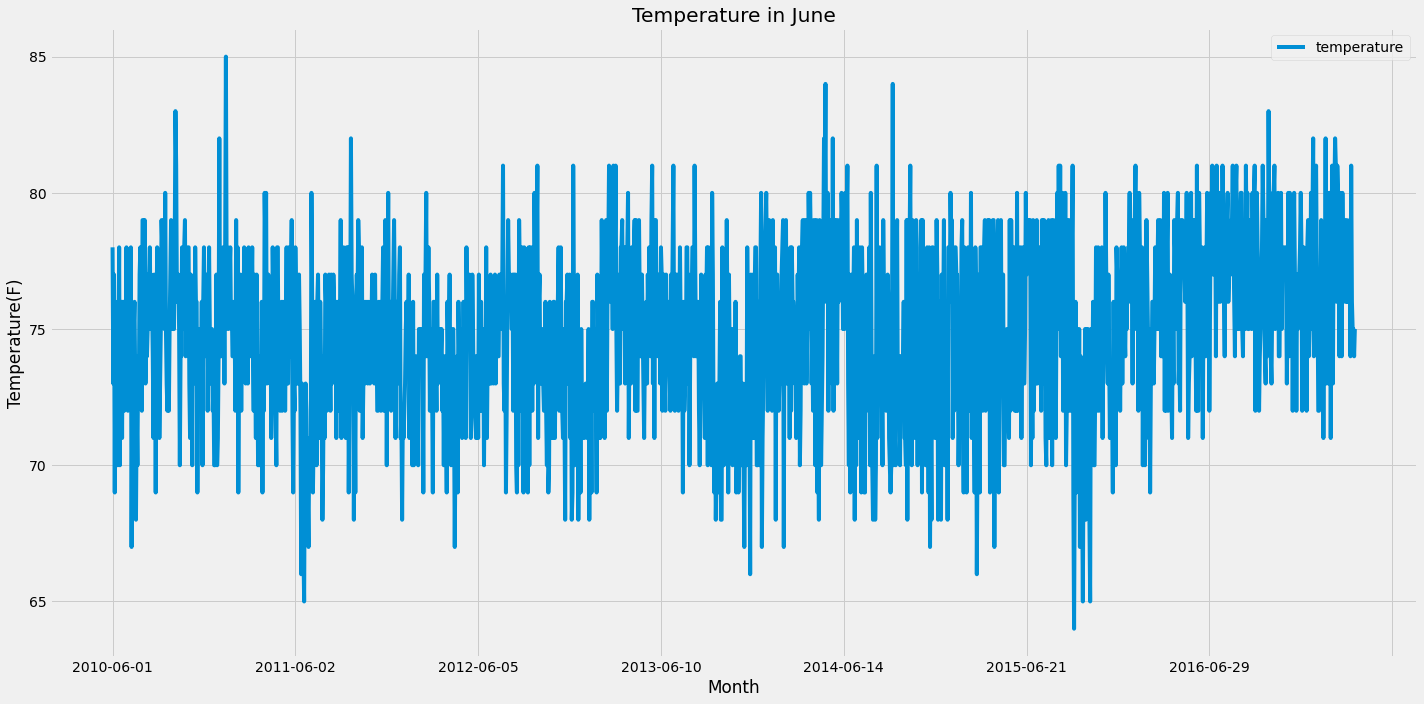

In [8]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#plot the resample DataFrame using the df.plot() function
df_june = df_june.sort_index()
df_june.plot(figsize=(20,10))
#  Add a x- and y-axis label.
plt.ylabel("Temperature(F)")
plt.xlabel("Month")
#  Add a title
plt.title("Temperature in June")
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [10]:
# 7. Convert the December temperatures to a list.
results_december = []
results_december = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_december = pd.DataFrame(results_december, columns=['date','temperature'])
df_december.set_index(df_december['date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_december.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


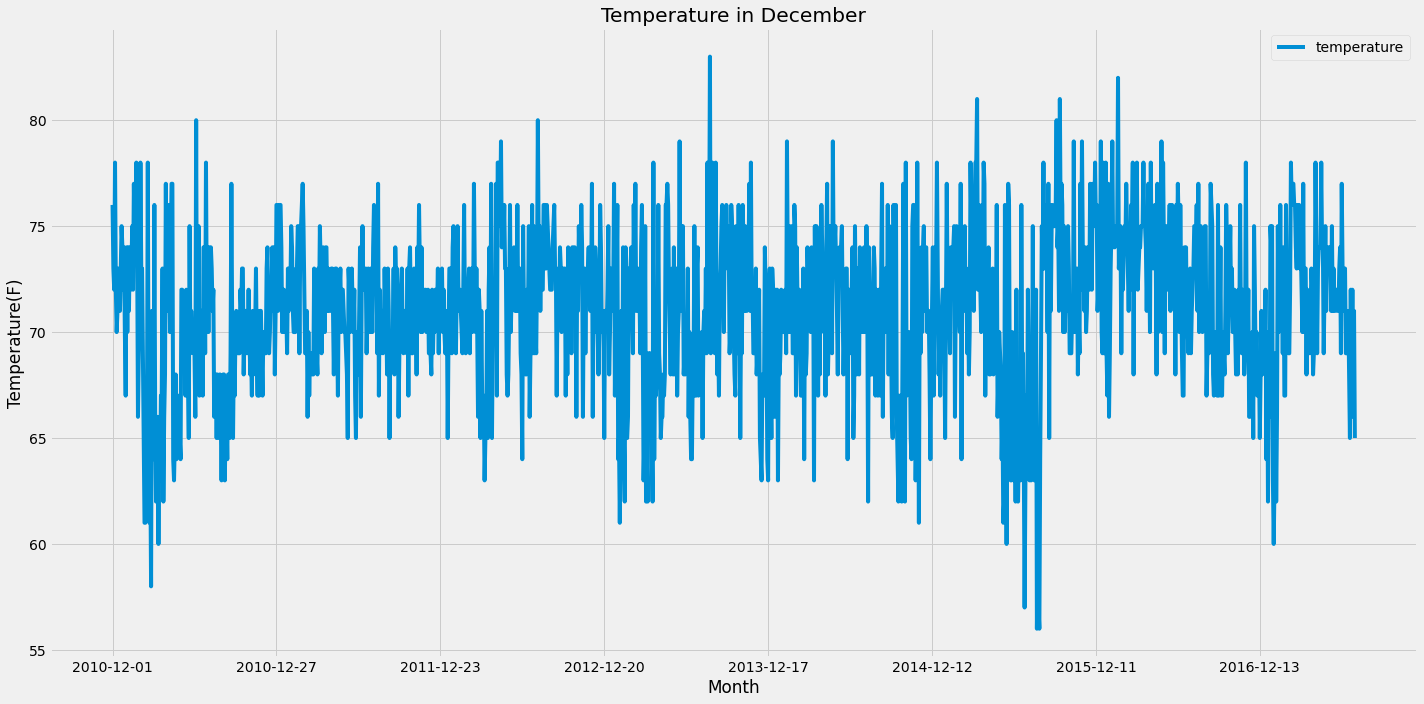

In [13]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#plot the resample DataFrame using the df.plot() function
df_december = df_december.sort_index()
df_december.plot(figsize=(20,10))
#  Add a x- and y-axis label.
plt.ylabel("Temperature(F)")
plt.xlabel("Month")
#  Add a title
plt.title("Temperature in December")
plt.tight_layout()

### Additional Queries and Analysis

In [14]:
#combining Measurement and Station Tables on station column
session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs,Station.name,Station.latitude,Station.longitude,Station.elevation).filter(Measurement.station == Station.station).all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0,

In [15]:
#Convert temperatures to a list.
Measurement_Station = []
Measurement_Station = session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs,Station.name,Station.latitude,Station.longitude,Station.elevation).filter(Measurement.station == Station.station).all()

In [16]:
#Create a DataFrame
df_Measurement_Station = pd.DataFrame(Measurement_Station, columns=['id','station','date','prcp','tobs','name','latitude','longitude','elevation'])
df_Measurement_Station.set_index(df_Measurement_Station['id'], inplace=True)

In [32]:
df_Measurement_Station.index.name = None
df_Measurement_Station

,id,station,date,prcp,tobs,name,latitude,longitude,elevation
1,1,USC00519397,2010-01-01,0.08,65.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2,USC00519397,2010-01-02,0.00,63.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,3,USC00519397,2010-01-03,0.00,74.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,4,USC00519397,2010-01-04,0.00,76.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,5,USC00519397,2010-01-06,NaN,73.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...
19546,19546,USC00516128,2017-08-19,0.09,71.0,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19547,USC00516128,2017-08-20,NaN,78.0,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19548,USC00516128,2017-08-21,0.56,76.0,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19549,19549,USC00516128,2017-08-22,0.50,76.0,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [18]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [19]:
#Convert the June precipitation to a list.
results_june = []
results_june = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all()

In [20]:
#Create a DataFrame from the list of precipitation for the month of June. 
df_june = pd.DataFrame(results_june, columns=['date','precipitation'])
df_june.set_index(df_june['date'], inplace=True)

In [21]:
#Calculate and print out the summary statistics for the June precipitation DataFrame.
df_june.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


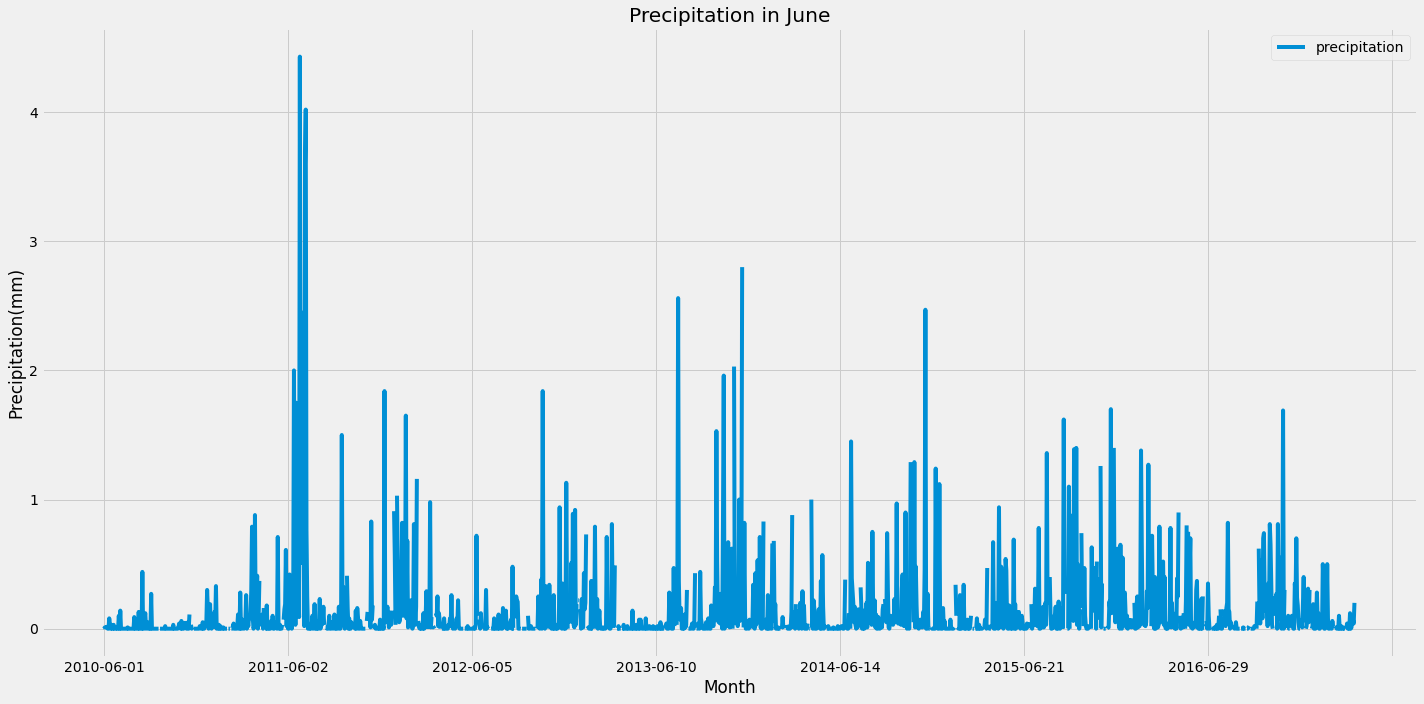

In [22]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#plot the resample DataFrame using the df.plot() function
df_june = df_june.sort_index()
df_june.plot(figsize=(20,10))
#  Add a x- and y-axis label.
plt.ylabel("Precipitation(mm)")
plt.xlabel("Month")
#  Add a title
plt.title("Precipitation in June")
plt.tight_layout()

In [23]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [24]:
#Convert the December temperatures to a list.
results_december = []
results_december = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

In [25]:
#Create a DataFrame from the list of precipitation for the month of December. 
df_december = pd.DataFrame(results_december, columns=['date','precipitation'])
df_december.set_index(df_december['date'], inplace=True)

In [26]:
#Calculate and print out the summary statistics for the December precipitation DataFrame.
df_december.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


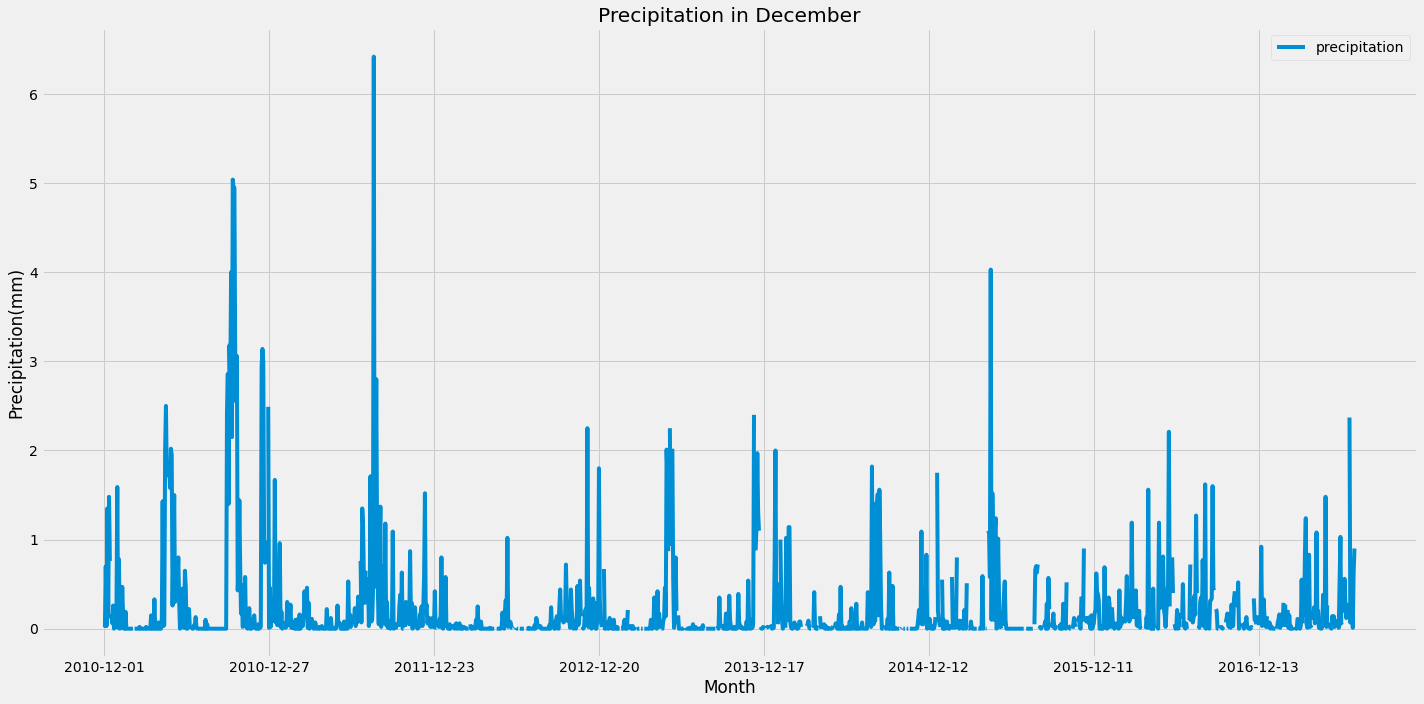

In [27]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#plot the resample DataFrame using the df.plot() function
df_december = df_december.sort_index()
df_december.plot(figsize=(20,10))
#  Add a x- and y-axis label.
plt.ylabel("Precipitation(mm)")
plt.xlabel("Month")
#  Add a title
plt.title("Precipitation in December")
plt.tight_layout()

In [34]:
# # Write a function called `rainfall` that will accept start date and end date in the format '%Y-%m-%d' 
# # and return the precipitation for that range of dates of different weather stations on different islands of Hawaii
### Get the dates from user
import pprint

start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")

# # Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# # and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date,end_date):
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return results
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(calc_temps(start_date,end_date))

# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
def rainfall(start_date,end_date):
    result = session.query(Measurement.station,
                             Station.name,
                             Measurement.prcp,
                             Station.latitude,
                             Station.longitude,
                             Station.elevation).\
                                group_by(Measurement.station).\
                                join(Station, Measurement.station == Station.station).\
                                filter(Measurement.date >= start_date).\
                                filter(Measurement.date <= end_date).\
                                order_by(desc('prcp')).all()
    return result

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(rainfall(start_date,end_date))

Enter the trip start date in 'YYYY-MM-DD' format: 2010-01-01
Enter the trip end date in 'YYYY-MM-DD' format: 2010-02-01
[(56.0, 69.16908212560386, 78.0)]
[   ('USC00513117', 'KANEOHE 838.1, HI US', 0.28, 21.4234, -157.8015, 14.6),
    ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 0.21, 21.4992, -158.0111, 306.6),
    ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.15, 21.33556, -157.71139, 19.5),
    ('USC00519281', 'WAIHEE 837.5, HI US', 0.15, 21.45167, -157.84888999999998, 32.9),
    ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.14, 21.3331, -157.8025, 152.4),
    ('USC00519397', 'WAIKIKI 717.2, HI US', 0.08, 21.2716, -157.8168, 3.0),
    ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.05, 21.3152, -157.9992, 0.9)]
